In [3]:
from statsmodels.tsa.stattools import adfuller
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas import Series
from sklearn.metrics import mean_squared_error
import requests
from datetime import datetime
import statsmodels.api as sm
from pandas.tools.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import acf, pacf

C:\Users\Shruthi M\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [4]:
url='https://poloniex.com/public?command=returnChartData&currencyPair=BTC_ETH&start=1435699200&end=9999999999&period=86400'
r=requests.get(url)
json_data=r.json()
print (type(json_data))

<class 'list'>


In [5]:
open=[]
close=[]
high=[]
low=[]
volume=[]
quotevolume=[]
weightedaverage=[]
Date=[]

In [6]:
for i in json_data:
    if i['date']>=0:
        Date.append(i['date'])
for i in json_data:
    if i['open']>=0:
        open.append(i['open'])      
for i in json_data:
    if i['close']>=0:
        close.append(i['close'])      
for i in json_data:
    if i['high']>=0:
        high.append(i['high'])      
for i in json_data:
    if i['volume']>=0:
        volume.append(i['volume'])      
for i in json_data:
    if i['low']>=0:
        low.append(i['low'])    
for i in json_data:
    if i['quoteVolume']>=0:
        quotevolume.append(i['quoteVolume'])      
for i in json_data:
    if i['weightedAverage']>=0:
        weightedaverage.append(i['weightedAverage'])  

In [7]:
dude=[Date, open, close, high,low,volume,quotevolume, weightedaverage]      
for i in range(8):
        print (len(dude[i]))

893
893
893
893
893
893
893
893


In [8]:
DF = pd.DataFrame(np.column_stack([Date,open,high,low, volume,quotevolume,weightedaverage,close]),
                               columns=['Date','open', 'high','low','volume','quotevolume','weightedaverage','close'])

DF.to_csv('BTC_ETH.csv', sep=',', encoding='utf-8')


ETH=pd.read_csv('BTC_ETH.csv',index_col=0)


In [9]:
ETH.head(5)

,Date,open,high,low,volume,quotevolume,weightedaverage,close
0,1.438992e+09,50.000000,50.000000,0.002620,1205.803321,2.662061e+05,0.004530,0.003125
1,1.439078e+09,0.003000,0.004100,0.002400,898.123434,3.139879e+05,0.002860,0.002581
2,1.439165e+09,0.002650,0.002902,0.002200,718.365266,2.845754e+05,0.002524,0.002645
3,1.439251e+09,0.002650,0.004400,0.002414,3007.274111,9.151385e+05,0.003286,0.003950
4,1.439338e+09,0.003955,0.004882,0.002910,4690.075032,1.117821e+06,0.004196,0.004500


In [10]:
#removing columns: open,high,low,volume,quotevolume and weighted average
ETH.drop(ETH.columns[[1,2,3,4,5,6]], axis=1, inplace=True)

In [9]:
ETH.head(5)

,Date,close
0,1.438992e+09,0.003125
1,1.439078e+09,0.002581
2,1.439165e+09,0.002645
3,1.439251e+09,0.003950
4,1.439338e+09,0.004500


In [11]:
for i in range(len(ETH)):
    ETH.ix[i,0]=datetime.fromtimestamp(ETH.ix[i,0]).strftime('%Y-%m-%d')
for i in range(len(ETH)):
    ETH.ix[i,0]=datetime.strptime(ETH.ix[i,0], '%Y-%m-%d').date()

C:\Users\Shruthi M\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


In [12]:
##Saving the file for future use: ETH.csv
ETH.to_csv('ETH.csv')

ETH=pd.read_csv('ETH.csv', index_col=1)    
ETH.drop(ETH.columns[[0]],axis=1,inplace=True)

print (ETH.head())

               close
Date                
2015-08-07  0.003125
2015-08-08  0.002581
2015-08-09  0.002645
2015-08-10  0.003950
2015-08-11  0.004500


In [13]:
print (ETH.index)

Index(['2015-08-07', '2015-08-08', '2015-08-09', '2015-08-10', '2015-08-11',
       '2015-08-12', '2015-08-13', '2015-08-14', '2015-08-15', '2015-08-16',
       ...
       '2018-01-06', '2018-01-07', '2018-01-08', '2018-01-09', '2018-01-10',
       '2018-01-11', '2018-01-12', '2018-01-13', '2018-01-14', '2018-01-15'],
      dtype='object', name='Date', length=893)


In [14]:
ETH.index = pd.to_datetime(ETH.index)

In [15]:
print (ETH.index)

DatetimeIndex(['2015-08-07', '2015-08-08', '2015-08-09', '2015-08-10',
               '2015-08-11', '2015-08-12', '2015-08-13', '2015-08-14',
               '2015-08-15', '2015-08-16',
               ...
               '2018-01-06', '2018-01-07', '2018-01-08', '2018-01-09',
               '2018-01-10', '2018-01-11', '2018-01-12', '2018-01-13',
               '2018-01-14', '2018-01-15'],
              dtype='datetime64[ns]', name='Date', length=893, freq=None)


In [16]:
#dickey fuller test and rolling statistics
def test_stationarity(timeseries):
    #Determing rolling statistics
    rolmean = pd.rolling_mean(timeseries, window=12)
    rolstd = pd.rolling_std(timeseries, window=12)
    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

C:\Users\Shruthi M\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=12,center=False).mean()
  after removing the cwd from sys.path.
C:\Users\Shruthi M\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: pd.rolling_std is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=12,center=False).std()
  """


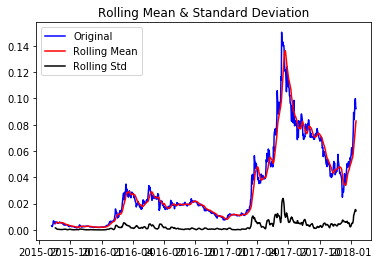

Results of Dickey-Fuller Test:


ValueError: too many values to unpack (expected 2)

In [17]:
test_stationarity(ETH)

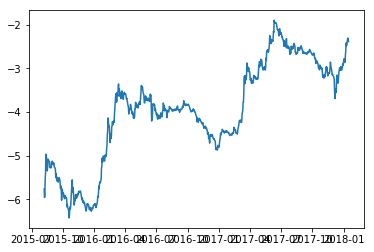

In [19]:
##Log transform for eliminating trend
ts_log = np.log(ETH)
plt.plot(ts_log)  
plt.show()

C:\Users\Shruthi M\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=12,center=False).mean()
  after removing the cwd from sys.path.
C:\Users\Shruthi M\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: pd.rolling_std is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=12,center=False).std()
  """


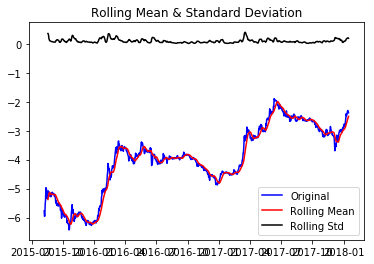

Results of Dickey-Fuller Test:


ValueError: too many values to unpack (expected 2)

In [20]:
test_stationarity(ts_log)

C:\Users\Shruthi M\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=20,center=False).mean()
  


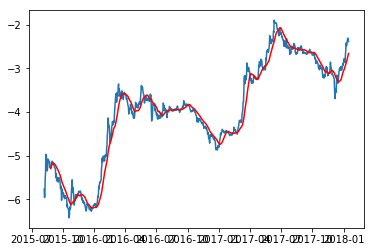

In [21]:
# rolling average for eliminating stationarity...smoothing technique
moving_avg = pd.rolling_mean(ts_log,20)
plt.plot(ts_log)
plt.plot(moving_avg, color='red')
plt.show()

C:\Users\Shruthi M\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=12,center=False).mean()
  after removing the cwd from sys.path.
C:\Users\Shruthi M\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: pd.rolling_std is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=12,center=False).std()
  """


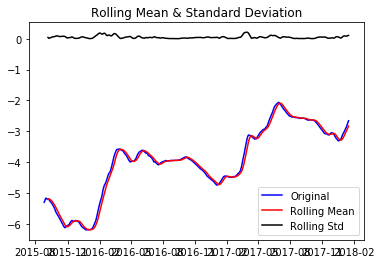

Results of Dickey-Fuller Test:


ValueError: too many values to unpack (expected 2)

In [22]:
test_stationarity(moving_avg)

C:\Users\Shruthi M\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  after removing the cwd from sys.path.
C:\Users\Shruthi M\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()
  """


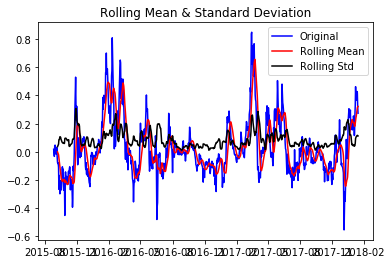

Results of Dickey-Fuller Test:
Test Statistic                -5.788399e+00
p-value                        4.937435e-07
#Lags Used                     3.000000e+00
Number of Observations Used    8.700000e+02
Critical Value (1%)           -3.437889e+00
Critical Value (5%)           -2.864868e+00
Critical Value (10%)          -2.568542e+00
dtype: float64


In [23]:
ts_log_moving_avg_diff = ts_log - moving_avg
ts_log_moving_avg_diff.dropna(inplace=True)
test_stationarity(ts_log_moving_avg_diff['close'])

C:\Users\Shruthi M\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: pd.ewm_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.ewm(halflife=12,min_periods=0,adjust=True,ignore_na=False).mean()
  """Entry point for launching an IPython kernel.


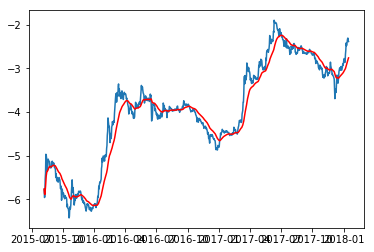

In [24]:
expwighted_avg = pd.ewma(ts_log, halflife=12)
plt.plot(ts_log)
plt.plot(expwighted_avg, color='red')
plt.show()

C:\Users\Shruthi M\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  after removing the cwd from sys.path.
C:\Users\Shruthi M\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()
  """


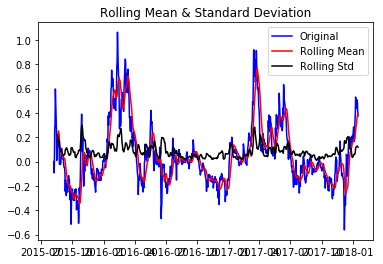

Results of Dickey-Fuller Test:
Test Statistic                  -4.449167
p-value                          0.000243
#Lags Used                       3.000000
Number of Observations Used    889.000000
Critical Value (1%)             -3.437727
Critical Value (5%)             -2.864797
Critical Value (10%)            -2.568504
dtype: float64


In [25]:
ts_log_ewma_diff = ts_log - expwighted_avg
test_stationarity(ts_log_ewma_diff['close'])


C:\Users\Shruthi M\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  after removing the cwd from sys.path.
C:\Users\Shruthi M\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()
  """


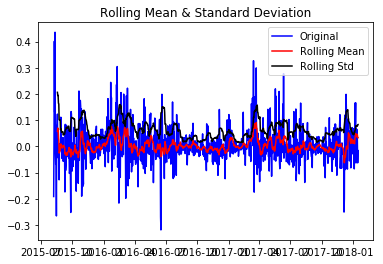

Results of Dickey-Fuller Test:
Test Statistic                -1.544196e+01
p-value                        2.857323e-28
#Lags Used                     2.000000e+00
Number of Observations Used    8.890000e+02
Critical Value (1%)           -3.437727e+00
Critical Value (5%)           -2.864797e+00
Critical Value (10%)          -2.568504e+00
dtype: float64


In [26]:
##first Differencing
ts_log_diff = ts_log - ts_log.shift()
ts_log_diff.dropna(inplace=True)
test_stationarity(ts_log_diff['close'])

In [28]:
decomposition = seasonal_decompose(ts_log)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

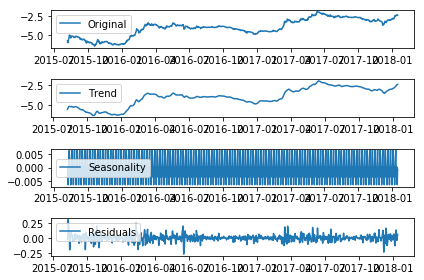

In [29]:
plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

C:\Users\Shruthi M\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  after removing the cwd from sys.path.
C:\Users\Shruthi M\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()
  """


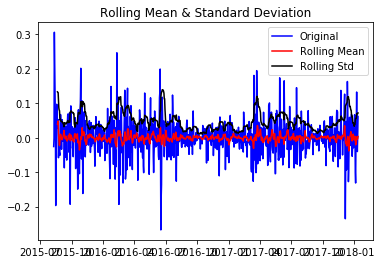

Results of Dickey-Fuller Test:
Test Statistic                -1.300825e+01
p-value                        2.600366e-24
#Lags Used                     1.700000e+01
Number of Observations Used    8.690000e+02
Critical Value (1%)           -3.437897e+00
Critical Value (5%)           -2.864872e+00
Critical Value (10%)          -2.568544e+00
dtype: float64


In [30]:
ts_log_decompose = residual
ts_log_decompose.dropna(inplace=True)
test_stationarity(ts_log_decompose.close)

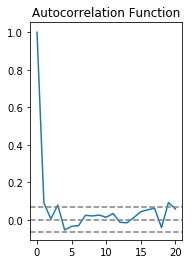

In [31]:
lag_acf = acf(ts_log_diff, nlags=20)
lag_pacf = pacf(ts_log_diff, nlags=20, method='ols')
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')
plt.show()

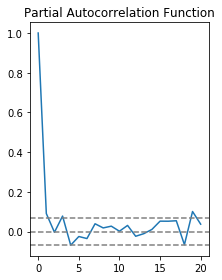

In [32]:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()
plt.show()

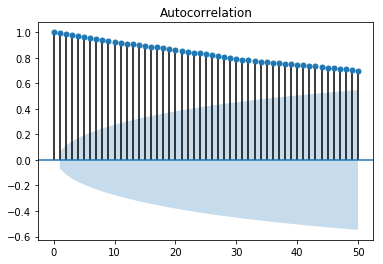

ValueError: ordinal must be >= 1

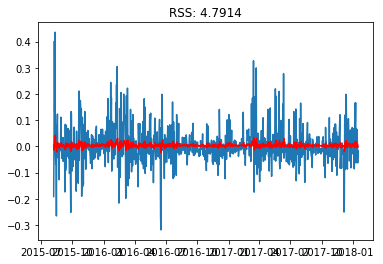

In [41]:
##Arima modeling
plot_acf(ETH.close,lags=50)
plot_pacf(ETH.close,lags=50)
model1 = ARIMA(ts_log, order=(1,1,0))
model1_fit = model1.fit(disp=-1)
plt.plot(ts_log_diff)
plt.plot(model1_fit.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((model1_fit.fittedvalues-ts_log_diff['close'])**2))
plt.show()
RSS=4.1369
model2 = ARIMA(ts_log, order=(0, 1, 1))  
model2_fit = model2.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(model2_fit.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((model2_fit.fittedvalues-ts_log_diff['close'])**2))
#RSS=4.1375
plt.show()

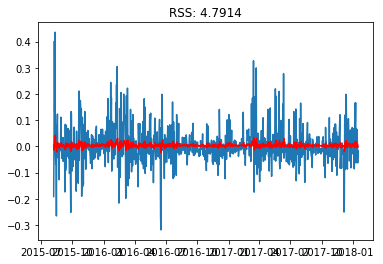

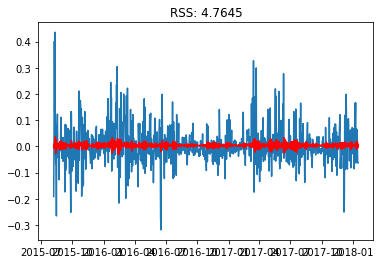

In [32]:
#combined model
model = ARIMA(ts_log, order=(1, 1, 1))  
results_ARIMA = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-ts_log_diff['close'])**2))
#RSS=4.1339
plt.show()

In [33]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
print (predictions_ARIMA_diff.head())

Date
2015-08-08    0.003740
2015-08-09   -0.007337
2015-08-10    0.014789
2015-08-11    0.018516
2015-08-12   -0.001343
dtype: float64


In [34]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print (predictions_ARIMA_diff_cumsum.head())

Date
2015-08-08    0.003740
2015-08-09   -0.003597
2015-08-10    0.011192
2015-08-11    0.029708
2015-08-12    0.028365
dtype: float64


In [35]:
predictions_ARIMA_log = pd.Series(ts_log.ix[0], index=ts_log.index[1:])
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
print (predictions_ARIMA_log.head())

Date
2015-08-08    0.003740
2015-08-09   -0.003597
2015-08-10    0.011192
2015-08-11    0.029708
2015-08-12    0.028365
dtype: float64


C:\Users\Shruthi M\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


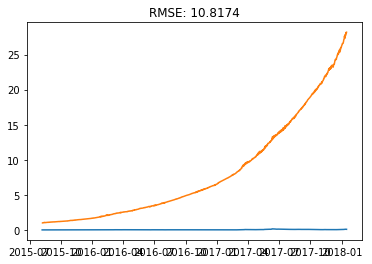

In [41]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(ETH)
plt.plot(predictions_ARIMA)
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA-ETH['close'][1:])**2)/len(ETH)))
#RMSE=10.23
plt.show()

In [39]:
print(model_fit.summary())
#plot residual errors
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.show()
residuals.plot(kind='kde')
plt.show()
print(residuals.describe())

NameError: name 'model_fit' is not defined